In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import data_cleaning
import matplotlib as plt
from data_cleaning import df_from_movie_csv, TABLE_FORMATS
%matplotlib inline

In [31]:
dfs = {}
for table_name in TABLE_FORMATS.keys():
    dfs[table_name] = df_from_movie_csv(table_name)

In [37]:
for df_name,movie_df in dfs.items():
    print(df_name,"\n",movie_df.head())

bom.movie_gross 
                                          title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
imdb.name.basics 
                 primary_name  birth_year  death_year  \
nconst                                                 
nm0061671  Mary Ellen Bauder         NaN         NaN   
nm0061865       Joseph Bauer         NaN         NaN   
nm0062070         Bruce Baum         NaN         NaN   
nm0062195       Axel Baumann         NaN         NaN   
nm0062798        Pete Baxter         NaN    

In [39]:
for df_name,movie_df in dfs.items():
    print("\n",df_name,"\n",movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

 bom.movie_gross 
 None
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB

 imdb.name.basics 
 None
<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-nul

In [3]:
imdb_title_ratings = dfs['imdb.title.basics'].join(dfs['imdb.title.ratings'])

AttributeError: module 'matplotlib' has no attribute 'set_title'

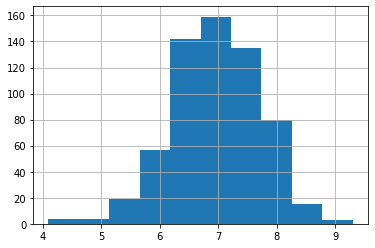

In [29]:
imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)]['averagerating'].hist()
plt.set_title('Average ratings')

In [15]:
from split_data_fields import expand_df_split_fields
title_genres = expand_df_split_fields(dfs['imdb.title.basics'],'imdb.title.basics')

In [41]:
top_movies = imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)].copy()
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, tt0359950 to tt7784604
Data columns (total 7 columns):
primary_title      618 non-null object
original_title     618 non-null object
start_year         618 non-null int64
runtime_minutes    618 non-null float64
genres             618 non-null object
averagerating      618 non-null float64
numvotes           618 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 38.6+ KB


In [48]:
imdb_bom_df = top_movies.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [49]:
imdb_bom_df

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,,,
tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383.0,Par.,72100000.0,38100000,2016
tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301.0,FoxS,56700000.0,131100000,2013
tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949.0,FoxS,18300000.0,42400000,2010
tt1272878,2 Guns,2 Guns,2013,109.0,"Action,Comedy,Crime",6.7,182025.0,Uni.,75600000.0,56300000,2013
tt1232829,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",7.2,477771.0,Sony,138400000.0,63100000,2012
tt2294449,22 Jump Street,22 Jump Street,2014,112.0,"Action,Comedy,Crime",7.0,319504.0,Sony,191700000.0,139600000,2014
tt1335975,47 Ronin,47 Ronin,2013,128.0,"Action,Adventure,Drama",6.3,135754.0,Uni.,38400000.0,113400000,2013
tt1306980,50/50,50/50,2011,100.0,"Comedy,Drama,Romance",7.7,300475.0,Sum.,35000000.0,4200000,2011
tt1606378,A Good Day to Die Hard,A Good Day to Die Hard,2013,98.0,"Action,Thriller",5.3,188383.0,Fox,67300000.0,237300000,2013


In [16]:
title_genre_ratings = title_genres.join(dfs['imdb.title.ratings'])

In [21]:
title_genre_ratings[(title_genre_ratings.numvotes > 100000) & (title_genre_ratings.genre == 'Action')] \
                   .averagerating.hist(by=title_genre_ratings['genre'])

ValueError: cannot reindex from a duplicate axis

This actually sort of appears to work:

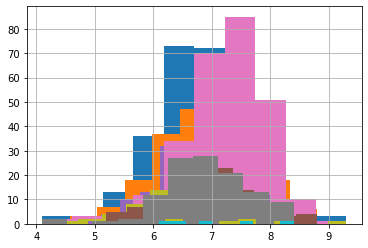

In [26]:
title_genre_ratings[title_genre_ratings.numvotes > 100000].groupby('genre').averagerating.hist();